In [91]:
'''
https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2
https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%204%20(GPU)%20-%20Convolutional%20Neural%20Networks.ipynb
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import os
import pickle
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

In [63]:
def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

def save_history(history, fileName):
    with open(fileName, 'wb') as fw:
       pickle.dump(history.history, fw, protocol=2)

def load_history(fileName):
    class Temp:
        pass
    history = Temp()
    with open(fileName, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    
    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()

In [57]:
#Model Definition
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', name='conv_1', input_shape=(150, 150, 3)))
model.add(MaxPool2D((2,2), name='maxpool_1'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='conv_2'))
model.add(MaxPool2D((2,2), name='maxpool_2'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', name= 'conv_3'))
model.add(MaxPool2D((2,2), name='maxpool_3'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', name='conv_4'))
model.add(MaxPool2D((2,2), name='maxpool_4'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dense(256, activation='relu', name='dense_2'))
model.add(Dense(1, activation='relu', name='output'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
#Data Generator
base_dir = os.curdir + '/dataset'
train_dir = os.path.join(base_dir, 'train_set')
validation_dir = os.path.join(base_dir, 'validation_set')
test_dir = os.path.join(base_dir, 'test_set')

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen =  ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [59]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, 
                    validation_steps= 50, verbose=1)

Epoch 1/20
100/100 [==============================] - 42s 421ms/step - loss: 7.7084 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 43s 430ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 44s 436ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/20
100/100 [==============================] - 45s 453ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/20
100/100 [==============================] - 46s 463ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/20
100/100 [==============================] - 47s 470ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/20
100/100 [==============================] - 52s 516ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_ac

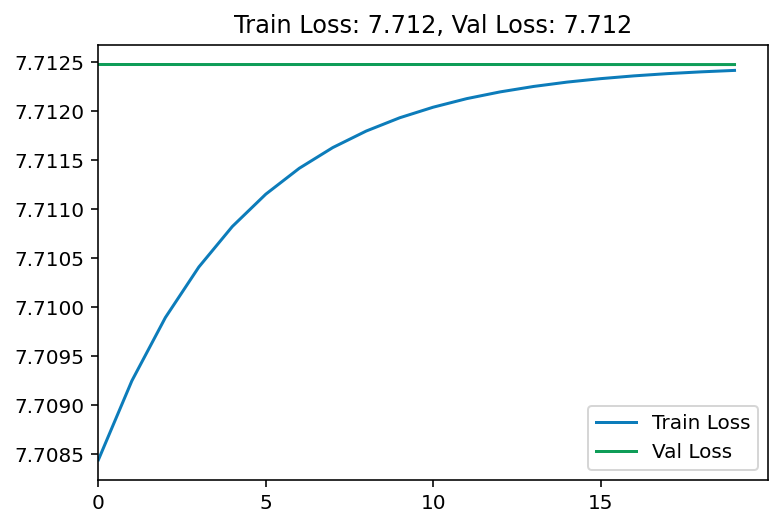

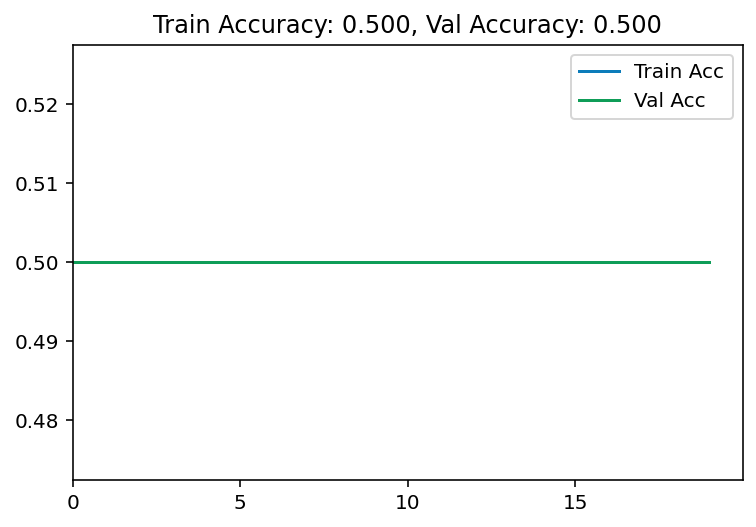

In [67]:
model.save('model.h5')
save_history(history, 'history.bin')

history = load_history('history.bin')
plot_compare(history)

In [94]:
model_aug = Sequential()
model_aug.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', input_shape = (150, 150, 3)))
model_aug.add(MaxPool2D((2,2), name='maxpool_1'))
model_aug.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
model_aug.add(MaxPool2D((2,2), name='maxpool_2'))
model_aug.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
model_aug.add(MaxPool2D((2,2), name='maxpool_3'))
model_aug.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv_4'))
model_aug.add(MaxPool2D((2, 2), name='maxpool_4'))
model_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='conv_5'))
model_aug.add(MaxPool2D((2, 2), name='maxpool_5'))
model_aug.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='conv_6'))
model_aug.add(MaxPool2D((2, 2), name='maxpool_6'))
model_aug.add(Flatten())
model_aug.add(Dropout(0.5))
#FC layer
model_aug.add(Dense(512, activation='relu', name='dense_1'))
model_aug.add(Dense(128, activation='relu', name='dense_2'))
#Output
model_aug.add(Dense(1, activation='sigmoid', name='output'))

model_aug.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

print(len(train_generator))
print(len(validation_generator))
# early_stop = EarlyStopping(monitor='val_loss', patience=6, verbose=1)
history_aug = model_aug.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=60, 
                        validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
63
32
Epoch 1/60
63/63 [==============================] - 57s 905ms/step - loss: 0.6981 - accuracy: 0.5070 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/60
63/63 [==============================] - 59s 944ms/step - loss: 0.6934 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/60
63/63 [==============================] - 61s 966ms/step - loss: 0.6935 - accuracy: 0.4825 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/60
63/63 [==============================] - 65s 1s/step - loss: 0.6933 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/60
63/63 [==============================] - 63s 998ms/step - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6922 - val_accuracy: 0.5160
Epoch 6/60
63/63 [==============================] - 62s 983ms/step - loss: 0.6958 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/60
63/63 [==============================] - 62s

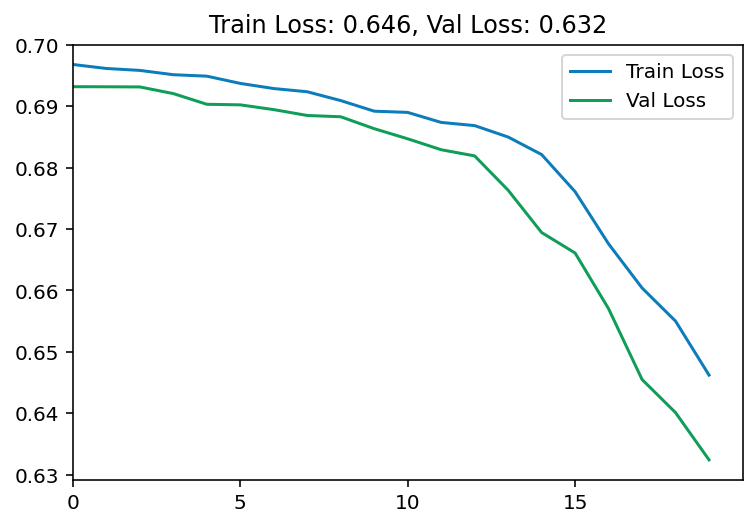

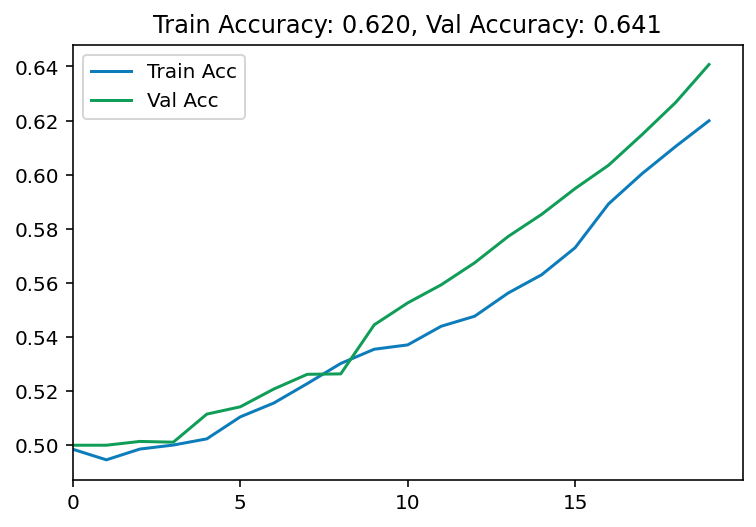

In [82]:
model_aug.save('model_aug.h5')
save_history(history_aug, 'history_aug.bin')

model_aug = load_history('history_aug.bin')
plot_compare(model_aug)

In [92]:
img_path = './dataset/train_set/cats/cat.54.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


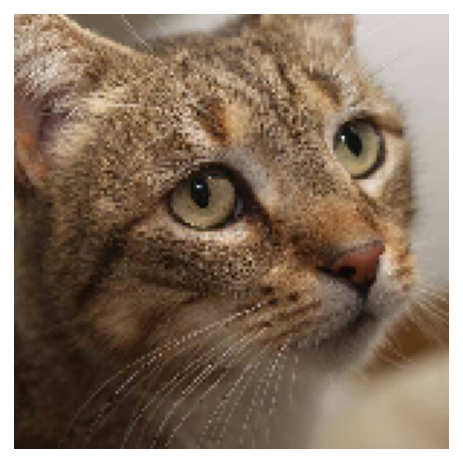

In [93]:
plt.imshow(img_tensor[0])
plt.axis('off')
plt.show()